# Numerical Computing with Scipy

Scipy library is a collection of numerical routines built on top of Numpy and provide tools for
- Linear algebra
- Integration
- Differential equation
- Root finding
- Optimization
- Interpolation
- Statistical distributions and random number generations

For more detailed information regarding the Scipy, you may refer to the documentations: https://docs.scipy.org/doc/scipy/index.html


In [3]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Linear algebra

refer to https://docs.scipy.org/doc/scipy/tutorial/linalg.html and https://docs.scipy.org/doc/scipy/reference/linalg.html

## Integration

Most numerical integration methods work by computing the integral of an approximating polynomial. Hence, the numerical integration inevitably entails approximation errorr of which degree depends on how well the polynomial fits the integrand, which in turn depends on how “regular” the integrand is. 

### Scalar function

Suppose that we want to calculate the following integreal: $$\int_0^5 e^{\sin(x)} dx $$

The integrand function looks as follows over the range of integration.


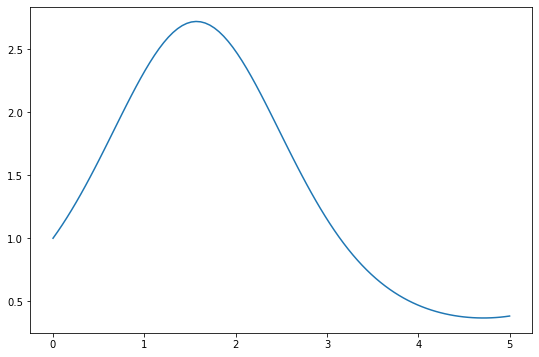

In [2]:
x = np.linspace(0,5,100)
f = lambda x: np.exp(np.sin(x))
y = f(x)

plt.figure(figsize=(9,6))
plt.plot(x,y)
plt.show()

SciPy provides several modules for numerical integration in `scipy.integrate`. A good default for univariate integration is `quad`. 

In [3]:
from scipy.integrate import quad

integral, app_error = quad(f, 0, 5)

In [4]:
integral, app_error

(7.18911925363128, 3.700509758263899e-13)

### Multi-dimensional function

It is well known that $$I(n) = \int_0^\infty \int_1^\infty \frac{e^{-xt}}{t^n} dt dx = \frac{1}{n}$$ 

We may check this out numerically!

In [6]:
from scipy.integrate import dblquad

n=10
dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

(0.09999999999998103, 1.4778125007750433e-09)

C:\Users\vkstk\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\vkstk\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


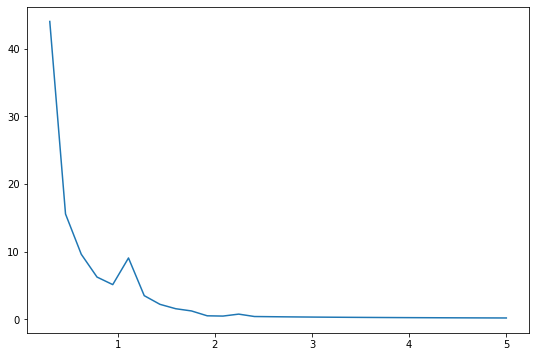

In [8]:
# plot integrals for n=0.3~5

def integral(n):
    return dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

ngrid = np.linspace(0.3,5,30)
integral_vec = np.array([integral(n) for n in ngrid])[:,0]

plt.figure(figsize=(9,6))
plt.plot(ngrid, integral_vec)
plt.show()

### Ordinary differential equation: Basic SIR Model

The numbers of the susceptible ($S$), the infected ($I$) and the recovered ($R$) evolve over time flows according to the following system of differential equations.
$$
\begin{align}
  \frac{dS}{dt} &= -\beta S I
  \\
  \frac{dI}{dt} &= \beta S I - \gamma I
  \\
  \frac{dR}{dt} &= \gamma I 
\end{align}
$$

In [7]:
# SIR system

beta = 1.0/6.0
gamma = 1.0/20.0

I0 = 1e-6
S0 = 1-I0
R0 = 0.0

def diff_eqs(level, t):

	S = level[0]
	I = level[1]
	R = level[2]

	S_dot = - beta * S * I
	I_dot = beta * S * I - gamma * I
	R_dot = gamma * I 

	return np.array([S_dot, I_dot, R_dot])

# solve ode 

from scipy.integrate import odeint

t_range = np.arange(0, 500)
RES = odeint(diff_eqs, (S0, I0, R0), t_range)


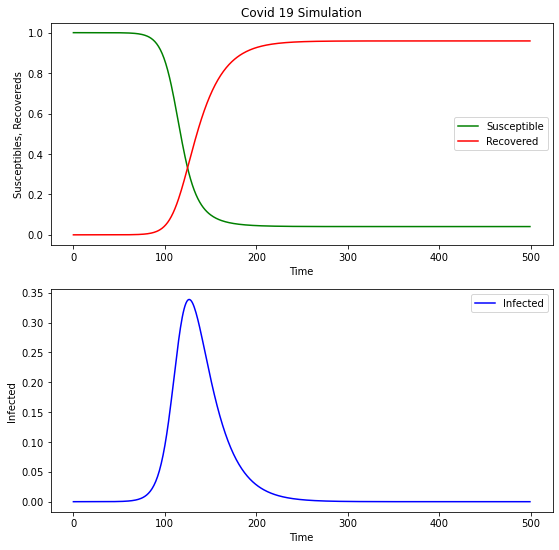

In [8]:
# Plot results

plt.figure(figsize=(9,9))

plt.subplot(211)
plt.plot(RES[:,0], '-g', label='Susceptible')
plt.plot(RES[:,2], '-r', label='Recovered')
plt.legend(loc='best')
plt.title('Covid 19 Simulation')
plt.xlabel('Time')
plt.ylabel('Susceptibles, Recovereds')

plt.subplot(212)
plt.plot(RES[:,1], '-b', label='Infected')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Infected')
plt.show()


For more about numerical integration modules, refer to https://docs.scipy.org/doc/scipy/tutorial/integrate.html

## Root finding

https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding

### Scalar function

There are several routines in Scipy library for root finding problems of single variable functions. Most of these algorithms require the endpoints of an interval (or bracket) in which a root is expected (because the function changes signs). In general, `brentq` is the best choice. When a bracket is not available, but one or more derivatives are available, then `newton` method may be applicable.

Suppose that we want to solve for the root of the following nonlinear equation:

$$x^3 - 2x + 3 = e^{\sqrt{x}} $$

The graphs of the left-hand side function and the right-had side function are as below. Let's denote $F(x)=x^3 - 2x + 3 - e^{\sqrt{x}}$ and solve for the root of $F(x)=0$. 

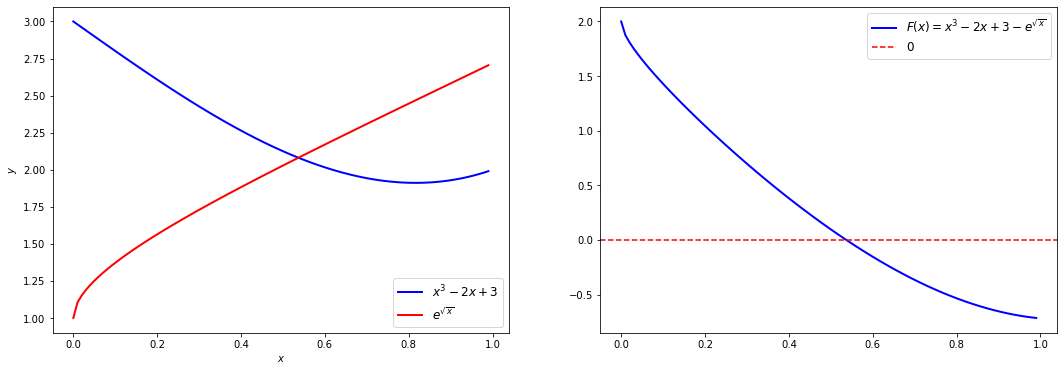

In [10]:
# define functions and calculate their values

xgrid = np.arange(0, 1, 0.01)
LHS = (lambda x: x**3 - 2*x +3)(xgrid)
RHS = (lambda x: np.exp(np.sqrt(x)))(xgrid)
F = lambda x: x**3 - 2*x +3 - np.exp(np.sqrt(x))
F_vals = F(xgrid)

# plot functions

fig, axes = plt.subplots(1,2, figsize=(18,6))

axes[0].plot(xgrid, LHS, 'b-', lw=2, label="$x^3-2x+3$")
axes[0].plot(xgrid, RHS, 'r-', lw=2, label="$e^{\sqrt{x}}$")
axes[0].legend(loc='lower right', fontsize=12)
axes[0].set_xlabel("$x$")

axes[1].plot(xgrid, F_vals, 'b-', lw=2, label=r"$F(x) = x^3-2x+3 - e^{\sqrt{x}}$")
axes[1].axhline(0, color='red', ls='--', label='0')
axes[1].legend(loc='upper right', fontsize=12)
axes[0].set_xlabel("$x$")
axes[0].set_ylabel("$y$")
plt.show()

In [10]:
# import scipy routines to solve NLE

from scipy.optimize import bisect, brentq, newton, root_scalar

**bisection** method: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect

In [11]:
bisect(F, 0, 1)


0.5369801433862449

**brentq** method: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq

In [12]:
brentq(F, 0, 1)

0.5369801433875698

**newton** method: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton

In [13]:
newton(F, 0.5)

0.5369801433873503

There is a wrapper routine for all above, **root_scalar**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar

In [14]:
root_scalar(F, method='bisect', bracket=(0, 1))

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 0.5369801433862449

In [15]:
root_scalar(F, method='newton', x0=0.5, fprime=(lambda x: 3*x**2 - 2 - 0.5/np.sqrt(x)*np.exp(np.sqrt(x))))

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 0.5369801433875563

### Multi-dimensional function

Finding a root of a set of nonlinear equations can be achieved using the `root` function. Several methods are available. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root

Suppose that $G: R^2 \rightarrow R^2$ is given as
$$
\begin{align}
G_1(x_0, x_1) &= \frac{1}{2} (x_0 - x_1)^3 + x_0 - 1 
\\
G_2(x_0, x_1) &= \frac{1}{2} (x_1 - x_0)^3 + x_1
\end{align}
$$

In [1]:
def G(x):
    return np.array([0.5 * (x[0] - x[1])**3 + x[0] - 1.0,
            0.5 * (x[1] - x[0])**3 + x[1]])

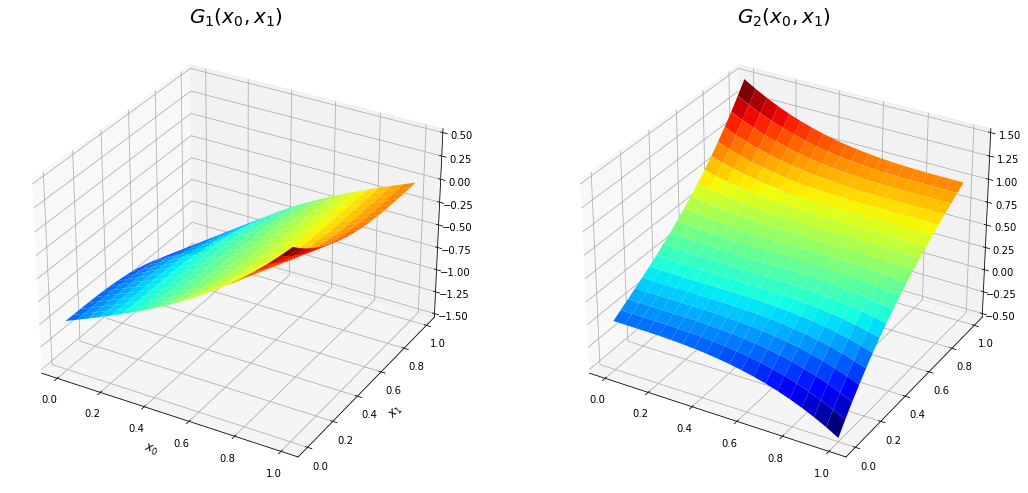

In [13]:
# set up grids for x0 and x1

x0grid = np.linspace(0,1,20)
x1grid = np.linspace(0,1,20)
x0, x1 = np.meshgrid(x0grid, x1grid)

# compute function values and plot

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(18, 9))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x0, x1, G([x0, x1])[0], rstride=1, cstride=1, cmap=cm.jet)
ax.set_title("$G_1(x_0, x_1)$", fontsize=20)
ax.set_xlabel("$x_0$", fontsize=12)
ax.set_ylabel("$x_1$", fontsize=12)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(x0, x1, G([x0, x1])[1], rstride=1, cstride=1, cmap=cm.jet)
ax.set_title("$G_2(x_0, x_1)$", fontsize=20)

plt.show()

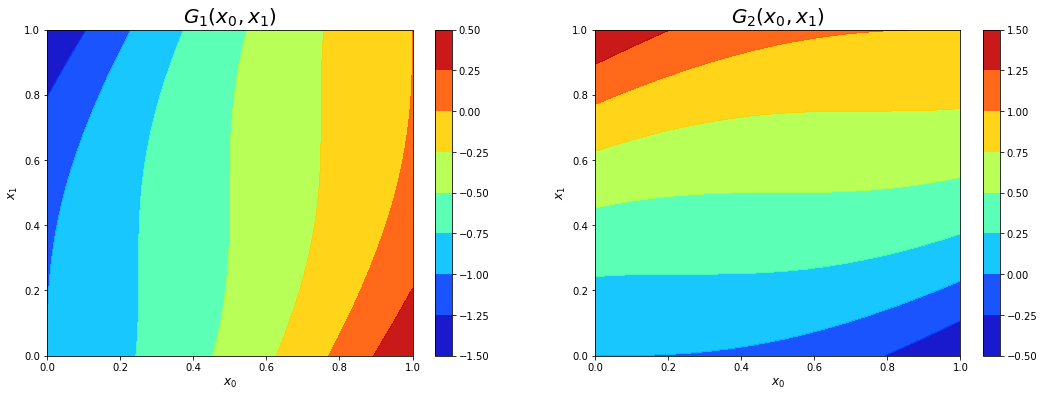

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.contourf(x0, x1, G([x0,x1])[0], cmap=cm.jet, alpha=0.9)
plt.title("$G_1(x_0, x_1)$", fontsize=20)
plt.xlabel("$x_0$", fontsize=12)
plt.ylabel("$x_1$", fontsize=12)
plt.colorbar()

plt.subplot(122)
plt.contourf(x0, x1, G([x0,x1])[1], cmap=cm.jet, alpha=0.9)
plt.title("$G_2(x_0, x_1)$", fontsize=20)
plt.xlabel("$x_0$", fontsize=12)
plt.ylabel("$x_1$", fontsize=12)
plt.colorbar()

plt.show()

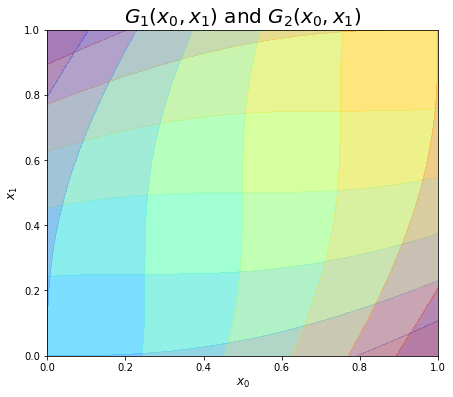

In [19]:
plt.figure(figsize=(7,6))
plt.contourf(x0, x1, G([x0,x1])[1], cmap=cm.jet, alpha=0.3)
plt.contourf(x0, x1, G([x0,x1])[0], cmap=cm.jet, alpha=0.3)
plt.title("$G_1(x_0, x_1)$ and $G_2(x_0, x_1)$", fontsize=20)
plt.xlabel("$x_0$", fontsize=12)
plt.ylabel("$x_1$", fontsize=12)

plt.show()

In [4]:
# solve F(x0, x1) = 0 using `root` with hybr method

from scipy.optimize import root

root(G, [0, 0], method='hybr')

    fjac: array([[-0.89914291,  0.43765515],
       [-0.43765515, -0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([ 1.19565972e-11, -4.12770392e-12])
       r: array([-2.16690469,  1.03701789, -1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])

`fsolve` is a wrapper function MINPACK's hybrd and hybrj algorithms. Hence it can be used for this problem instead of `root`. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

In [21]:
# solve F(x0, x1) = 0 using `fsolve`

from scipy.optimize import fsolve

fsolve(G, (0,0))

array([0.8411639, 0.1588361])

In fact, `fsolve` is a very general nonlinear equation solver so that it can also be used for the scalar function.

In [22]:
fsolve(F, 0.5)

array([0.53698014])

## Optimization

Mathematical optimization deals with the problem of finding numerically minimums (or maximums) of a function. `scipy.optimize.minimize` provides several methods from which you can choose depending on the shape of the objective function. Hence, figuring out your problem is critical.

- Dimensionality of the problem: the number of variables on which the search is performed

- Differentiability: A function $f:X\to Y$ is differentiable if $X$ is an open set and $\forall x\in X$ the derivative $\displaystyle{f'(x)=\lim_{h\to 0}{\frac{f(x+h)-f(x)}{h}}}$ exists.

- Convexity: A function $f: X \to Y$ is convex if $X$ is a convex set and $\forall x, y \in X$ and $\forall t \in [0, 1]$, $f(t x + (1 − t)y) \le t f(x) + (1 − t)f(y)$.

<img src="Data_Fig/Convex-function.png" style="width:30%;"> <img src="Data_Fig/Convex-and-nonconvex-functions.png" style="width:50%;">


### Univariate function minimization

Suppose that we want to minimize a function $f(x) = x^2 + 10 \sin(x)$ of which graph looks as below. The local minimum of this function can be found using `scipy.optimize.minimize_scalar` routine that implement Brent's algorithm. For more info, refer to https://docs.scipy.org/doc/scipy/tutorial/optimize.html#univariate-function-minimizers-minimize-scalar and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar

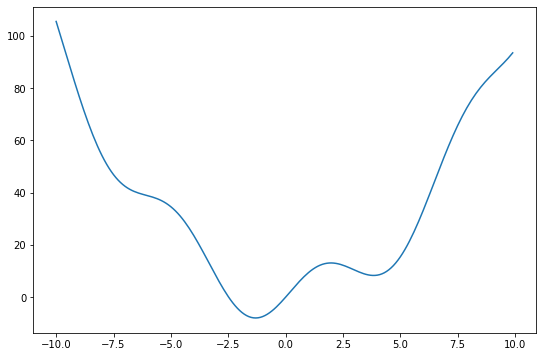

In [6]:
# define the objective function

def f(x):
    return x**2 + 10*np.sin(x)

# plot 

x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(9,6))
plt.plot(x, f(x))
plt.show()

In [7]:
# find the local minimum

from scipy.optimize import minimize_scalar, minimize

minimize_scalar(f, method='brent', bracket=(-3,-1,0))
#minimize_scalar(f, method='brent', bracket=(3,4,5))
#minimize_scalar(f)


     fun: -7.945823375615284
    nfev: 14
     nit: 10
 success: True
       x: -1.3064400083208694

In [8]:
# constrained minimization

minimize_scalar(f, method='bounded', bounds=(-10,10))
#minimize_scalar(f, method='bounded', bounds=(3,5))

     fun: -7.945823375615237
 message: 'Solution found.'
    nfev: 13
  status: 0
 success: True
       x: -1.306440096615395

You may use the `minimize` function which is more suitable for locating the minimum of multivariate scalar functions.

In [9]:
# use 'minimize'

print(minimize(f, x0=0, method="BFGS"))
#print(minimize(f, x0=4, method="BFGS"))

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


### Unconstrained Mininization of multivariate functions

Suppose that we want to minimize the following function:

$$H(x_0, x_1) = \left(4 - 2.1x_0 + \frac{1}{3}x_0^4\right)x_0^2 + x_0 x_1 + (4x_1^2-4)x_1^2$$

This function is known as *Six-hump camel-back function* and has six local minima, two of which are global. The graph of the function looks as below..

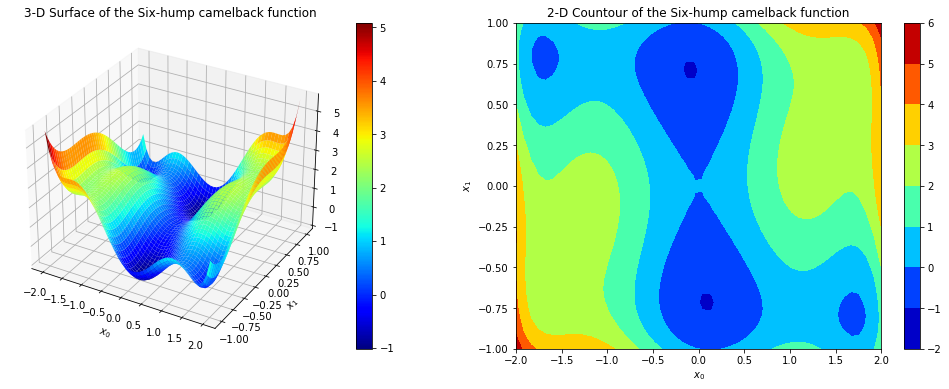

In [14]:
# Define the function

def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# plot of the function

x0grid = np.linspace(-2, 2, 50)
x1grid = np.linspace(-1, 1, 50)
x0, x1 = np.meshgrid(x0grid, x1grid)

fig = plt.figure(figsize=(18,6))

# 3D surface

ax = fig.add_subplot(121, projection='3d')
surface = ax.plot_surface(x0, x1, sixhump([x0,x1]), rstride=1, cstride=1, cmap=plt.cm.jet)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('3-D Surface of the Six-hump camelback function')
plt.colorbar(surface)

# 2D contour

ax = fig.add_subplot(122)
surf = ax.contourf(x0, x1, sixhump([x0, x1]), cmap=cm.jet)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('2-D Countour of the Six-hump camelback function')
plt.colorbar(surf)
plt.show()

The local minima can be found using `minimize` function with an appropriate method. For more information, refer to https://docs.scipy.org/doc/scipy/tutorial/optimize.html#unconstrained-minimization-of-multivariate-scalar-functions-minimize and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize


In [15]:
# Find the minima, which is one of the global minima

minimize(sixhump, x0=[0, -0.7], method='BFGS')
#minimize(sixhump, x0=[1.5, 0.6], method='Nelder-Mead')

      fun: -1.0316284534898772
 hess_inv: array([[ 0.12930974, -0.00777524],
       [-0.00777524,  0.06177124]])
      jac: array([1.49011612e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.08984201, -0.71265641])

In [16]:
# one of the local minima

minimize(sixhump, x0=[1.5, 0.6], method='BFGS')

      fun: 2.104250310311267
 hess_inv: array([[ 0.10520677, -0.01313927],
       [-0.01313927,  0.1311584 ]])
      jac: array([-1.19209290e-07, -3.27825546e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([1.60710474, 0.56865141])

### Constrained Minimization of multivariate functions

Let us consider the constrained minimization of the Rosenbrock function:

$$
\min 100\left(x_1 - x_0^2\right)^2 + (1-x_0)^2
$$
subject to: 
$$
\begin{align}
x_0 + 2x_1 \le 1
\\
x_0^2 + x_1 \le 1
\\
x_0^2 - x_1 \le 1
\\
2x_0 + x_1 = 1
\\
0 \le x_0 \le 1
\\
-0.5 \le x_1 \le 2
\end{align}
$$

The graph of the object function looks as below. The `minimize` function provides algorithms for constrained minimization, namely *trust-constr*, *SLSQP* and *COBYLA*. They require the constraints to be defined using slightly different structures. 


In [3]:
# Define the function
import numpy as np
def rosenbrock(x):
    return 100 * (x[1]-x[0]**2)**2 + (1-x[0])**2

# plot of the function

x0grid = np.linspace(-2, 2, 50)
x1grid = np.linspace(-1, 5, 50)
x0, x1 = np.meshgrid(x0grid, x1grid)

# fig = plt.figure(figsize=(18,6))

# # 3D surface

# ax = fig.add_subplot(121, projection='3d')
# surface = ax.plot_surface(x0, x1, rosenbrock([x0,x1]), rstride=1, cstride=1, cmap=cm.jet)
# ax.set_xlabel('$x_0$')
# ax.set_ylabel('$x_1$')
# ax.set_title('3-D Surface of the Rosenbrock function')
# plt.colorbar(surface)

# # 2D contour

# ax = fig.add_subplot(122)
# contour = ax.contourf(x0, x1, rosenbrock([x0, x1]), cmap=cm.jet)
# ax.set_xlabel('$x_0$')
# ax.set_ylabel('$x_1$')
# ax.set_title('2-D Contour of the Rosenbrock function')
# plt.colorbar(contour)
# plt.show()

#### Trust-Region Constrained Algorithm (method='trust-constr')

The bound constraints (5) and (6) can be written in matrix form as follows:
$$
\begin{bmatrix}
0 \\
-0.5
\end{bmatrix}
\le
\begin{bmatrix}
x_0 \\
x_1
\end{bmatrix}
\le
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$$

The linear constraints (1) and (4) can be written in matrix form as follows:
$$
\begin{bmatrix}
-\infty \\
1
\end{bmatrix}
\le
\begin{bmatrix}
1 & 2 \\
2 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1
\end{bmatrix}
\le
\begin{bmatrix}
1 \\
1
\end{bmatrix}
$$

The nonlinear constraints (2) and (3) can be written in matrix form as follows:
$$
c(x) = 
\begin{bmatrix}
x_0^2 + x_1 \\
x_0^2 - x_1
\end{bmatrix}
\le
\begin{bmatrix}
1 \\
1
\end{bmatrix}
$$


In [5]:
# define constraints
from scipy.optimize import minimize
from scipy.optimize import Bounds, LinearConstraint, NonlinearConstraint

bounds = Bounds(lb=[0, -0.5], ub=[1.0, 2.0])
#bounds = ((0, 1), (-0.5, 2.0))
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])
nonlinear_constraint = NonlinearConstraint(lambda x: [x[0]**2 + x[1], x[0]**2 - x[1]], [-np.inf,-np.inf], [1,1])

# call minimize with method = 'trust-constr'

minimize(rosenbrock, [0.5, 0], method='trust-constr', bounds=bounds, constraints=(linear_constraint, nonlinear_constraint))

 barrier_parameter: 0.00016000000000000007
 barrier_tolerance: 0.00016000000000000007
          cg_niter: 7
      cg_stop_cond: 1
            constr: [array([0.75516406, 1.        ]), array([0.34228898, 0.00207024]), array([0.41494531, 0.17010937])]
       constr_nfev: [0, 24, 0]
       constr_nhev: [0, 0, 0]
       constr_njev: [0, 0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.02549457550048828
               fun: 0.34271757564429445
              grad: array([-0.82649317, -0.41404723])
               jac: [array([[1, 2],
       [2, 1]]), array([[ 0.82989064,  1.        ],
       [ 0.82989064, -1.        ]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([ 2.24023634e-09, -4.48047244e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 24
              nhev: 0
               nit: 12
             niter: 12
              njev: 8
        optimality: 4.48047243737140

#### Sequential Least SQuares Programming (SLSQP) Algorithm (method='SLSQP')

Constraints must be provided in a dictionary. The SLSQP accepts both equality and inequality constraints.

In [6]:
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1])}

minimize(rosenbrock, [0.5, 1], method='SLSQP', bounds=bounds, constraints=[eq_cons, ineq_cons])


     fun: 0.3427180693398168
     jac: array([-0.8152331 , -0.42753339])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.41496914, 0.17006171])

#### Constrained Optimization BY Linear Approximation (COBYLA) Algorithm (method='COBYLA')

Constraints must be provided in a dictionary. The COBYLA accepts only inequality constraints.

In [38]:
minimize(rosenbrock, [0.5, 1], method='COBYLA', bounds=bounds, constraints=ineq_cons)

/Users/sunbink/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:544: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


     fun: 0.24889949500086797
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 118
  status: 1
 success: True
       x: array([0.50209884, 0.24895058])

## Interpolation

Suppose that you have a few numbers of data points and that you want to interpolate between known data values to obtain unknown values. 

There are several general facilities available in SciPy for interpolation for data in 1, 2, and higher dimensions. The choice of a specific interpolation routine depends on the data: whether it is one-dimensional, is given on a structured grid, or is unstructured. One other factor is the desired smoothness of the interpolator.

### 1-D Interpolation

In [ ]:
# set up fixed data points

n = 9
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / n)

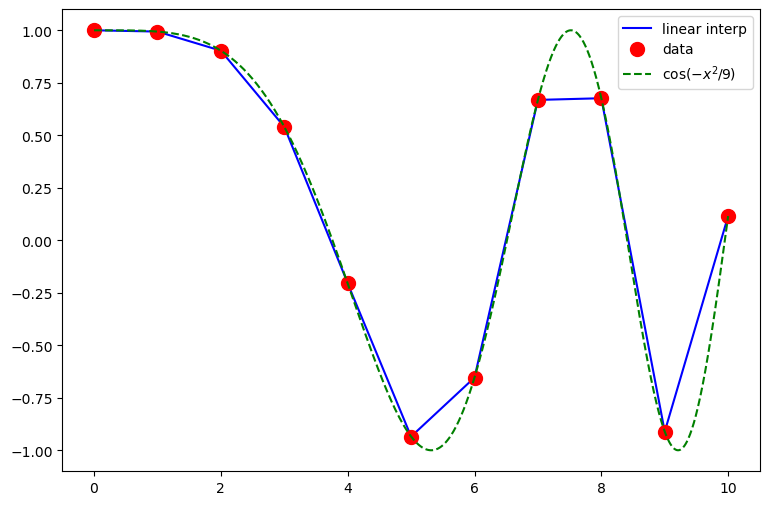

In [ ]:
# construct pircewise linear interpolation

x_fine = np.linspace(0, 10, num=1001)
y_lin_interp = np.interp(x_fine, x, y)
y_true = np.cos(-x_fine**2 / n)

plt.figure(figsize=(9,6))
plt.plot(x_fine, y_lin_interp, 'b-', label='linear interp')
plt.plot(x, y, 'ro', ms=10, label='data')
plt.plot(x_fine, y_true, 'g--', label=f'$\cos(-x^2/{n})$')
plt.legend(loc='best')
plt.show()

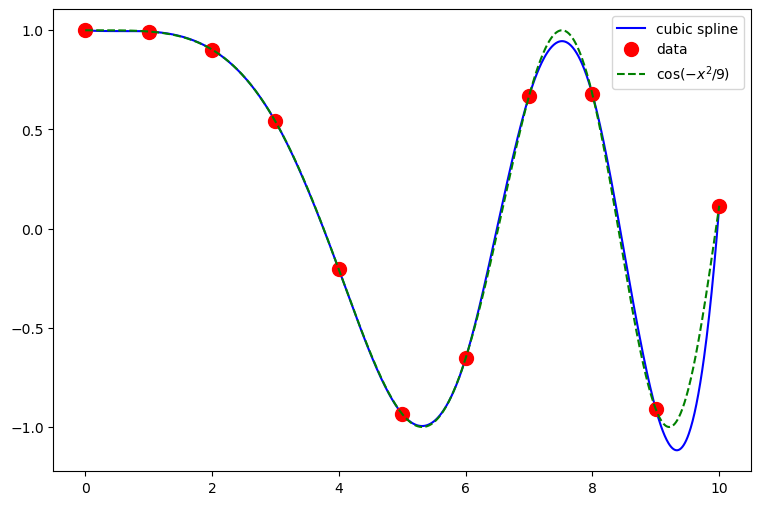

In [ ]:
# cubic spline interpolation

from scipy.interpolate import CubicSpline

spl = CubicSpline(x,y)
y_cubic_spline = spl(x_fine)

plt.figure(figsize=(9,6))
plt.plot(x_fine, y_cubic_spline, 'b-', label='cubic spline')
plt.plot(x, y, 'ro', ms=10, label='data')
plt.plot(x_fine, y_true, 'g--', label=f'$\cos(-x^2/{n})$')
plt.legend(loc='best')
plt.show()

Another routine for 1-D interpolation is available, `interp1d` although it is not recommended by Scipy since v1.10. It will be removed from the library soon. The `interp1d` with `kind='linear'` is same as `np.interp`, and `with kind='cubic'` same as `CubicSpline`.

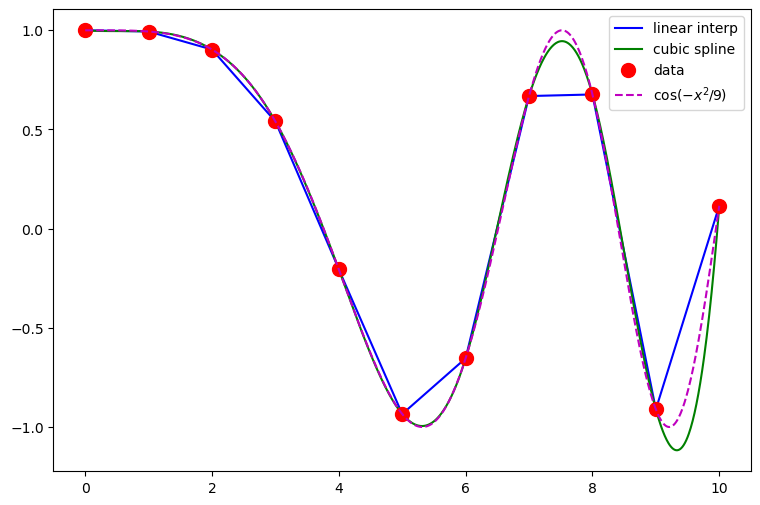

In [ ]:
from scipy.interpolate import interp1d

lin1d = interp1d(x,y, kind='linear')
spl1d = interp1d(x,y, kind='cubic')

y_lin_interp = lin1d(x_fine)
y_cubic_spline = spl1d(x_fine)

plt.figure(figsize=(9,6))
plt.plot(x_fine, y_lin_interp, 'b-', label='linear interp')
plt.plot(x_fine, y_cubic_spline, 'g-', label='cubic spline')
plt.plot(x, y, 'ro', ms=10, label='data')
plt.plot(x_fine, y_true, 'm--', label=f'$\cos(-x^2/{n})$')
plt.legend(loc='best')
plt.show()

## Statistical Distributioons and Random Numbers

refer to https://docs.scipy.org/doc/scipy/tutorial/stats.html#